# EDA 1 : Craigslist Cartrucks Dataset



In [2]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Load Data

In [3]:
cars = pd.read_csv('craigslist-carstrucks-data\craigslistVehiclesFull.csv')
cars.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/2010-dod...,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,...,red,https://images.craigslist.org/00i0i_2ggH1eKDNK...,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,https://marshall.craigslist.org/cto/d/fleetwoo...,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00M0M_irjh7SjEcU...,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,https://marshall.craigslist.org/cto/d/2008-for...,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,...,NaN,https://images.craigslist.org/00s0s_eL2XFhEUcx...,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,...,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,https://marshall.craigslist.org/cto/d/2001-gra...,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,...,NaN,https://images.craigslist.org/00n0n_bJJ1XnonSG...,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


### Tipe Data

In [4]:
# Melihat tipe data dari tabel cars

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 26 columns):
url             object
city            object
price           int64
year            float64
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
vin             object
drive           object
size            object
type            object
paint_color     object
image_url       object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(7), int64(1), object(18)
memory usage: 341.8+ MB


### Drop Column

In [5]:
# Terdapat 2 features unik (url & image_url) yang dapat dikatakan bahwa features tersebut tdk dapat dianalisis lebih lanjut
# sehingga 2 features tersebut akan dihapuskan saja

cars = cars.drop(columns = ['url', 'image_url'], axis = 1)
cars.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,...,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,...,sedan,grey,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,clean,...,NaN,NaN,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


### Missing Values Detection

In [6]:
# Deteksi ada/tidaknya missing values pada setiap features

count_missing = cars.isnull().sum().sort_values(ascending = False)
count_missing.head(24)

size            1123967
vin             1118215
type             702931
condition        700790
paint_color      695650
cylinders        691291
drive            661884
odometer         564054
manufacturer     136414
make              69699
weather           59428
county_fips       58833
county_name       58833
state_fips        58833
state_code        58833
fuel              10367
transmission       9022
year               6315
title_status       2554
lat                   0
state_name            0
long                  0
price                 0
city                  0
dtype: int64

In [7]:
# Melihat persentase missing values pada setiap features

percentage = round(cars.isnull().sum()/len(cars)*100,2).sort_values(ascending = False)
percentage.head(24)

size            65.23
vin             64.90
type            40.80
condition       40.67
paint_color     40.37
cylinders       40.12
drive           38.41
odometer        32.74
manufacturer     7.92
make             4.05
weather          3.45
county_fips      3.41
county_name      3.41
state_fips       3.41
state_code       3.41
fuel             0.60
transmission     0.52
year             0.37
title_status     0.15
lat              0.00
state_name       0.00
long             0.00
price            0.00
city             0.00
dtype: float64

### Drop Column Missing Values > 60%

In [8]:
# terdapat 2 features (size, vin) yang persentasenya > 60%
# sehingga features tersebut akan di drop dari tabel cars

cars = cars.drop(columns = ['size', 'vin'], axis = 1)
cars.head()

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type,paint_color,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,marshall,11900,2010.0,dodge,challenger se,good,6 cylinders,gas,43600.0,clean,...,coupe,red,43.4775,-96.7041,46083.0,Lincoln,46.0,SD,South Dakota,38.0
1,marshall,1515,1999.0,NaN,fleetwood,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.7612,-96.6907,46039.0,Deuel,46.0,SD,South Dakota,38.0
2,marshall,17550,2008.0,ford,f-150,NaN,NaN,gas,NaN,clean,...,NaN,NaN,44.1415,-103.2052,46093.0,Meade,46.0,SD,South Dakota,38.0
3,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591.0,clean,...,sedan,grey,43.2845,-95.5930,19143.0,Osceola,19.0,IA,Iowa,47.0
4,marshall,400,2001.0,NaN,2001 Grand Prix,NaN,NaN,gas,217000.0,clean,...,NaN,NaN,43.0261,-94.4064,19109.0,Kossuth,19.0,IA,Iowa,47.0


### Change Data Type

In [9]:
# Mengubah tipe data 'year' menjadi string
# sebab 'year' termasuk dalam variabel kategorik

cars['year'] = cars['year'].astype(str)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723065 entries, 0 to 1723064
Data columns (total 22 columns):
city            object
price           int64
year            object
manufacturer    object
make            object
condition       object
cylinders       object
fuel            object
odometer        float64
title_status    object
transmission    object
drive           object
type            object
paint_color     object
lat             float64
long            float64
county_fips     float64
county_name     object
state_fips      float64
state_code      object
state_name      object
weather         float64
dtypes: float64(6), int64(1), object(15)
memory usage: 289.2+ MB


### Categorical vs. Numerical

In [10]:
# Mendefinisikan variabel kategorik

kategorik = ['year', 'city','manufacturer', 'make', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive',
            'type', 'paint_color', 'county_name', 'state_code', 'state_name']
categorical = cars[kategorik]
categorical.head()

,year,city,manufacturer,make,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,county_name,state_code,state_name
0,2010.0,marshall,dodge,challenger se,good,6 cylinders,gas,clean,automatic,rwd,coupe,red,Lincoln,SD,South Dakota
1,1999.0,marshall,NaN,fleetwood,NaN,NaN,gas,clean,other,NaN,NaN,NaN,Deuel,SD,South Dakota
2,2008.0,marshall,ford,f-150,NaN,NaN,gas,clean,automatic,NaN,NaN,NaN,Meade,SD,South Dakota
3,2004.0,marshall,ford,taurus,good,6 cylinders,gas,clean,automatic,fwd,sedan,grey,Osceola,IA,Iowa
4,2001.0,marshall,NaN,2001 Grand Prix,NaN,NaN,gas,clean,automatic,NaN,NaN,NaN,Kossuth,IA,Iowa


In [11]:
# Mendefinisikan variabel numerical

numerical = cars.drop(kategorik, axis=1)
numerical.head()

,price,odometer,lat,long,county_fips,state_fips,weather
0,11900,43600.0,43.4775,-96.7041,46083.0,46.0,38.0
1,1515,NaN,44.7612,-96.6907,46039.0,46.0,38.0
2,17550,NaN,44.1415,-103.2052,46093.0,46.0,38.0
3,2800,168591.0,43.2845,-95.5930,19143.0,19.0,47.0
4,400,217000.0,43.0261,-94.4064,19109.0,19.0,47.0


### Change Missing Values with Mean (Numerical) & Mode (Categorical)

In [12]:
# Menggantikan missing value dengan mean untuk data numerical

for num in numerical:
    mean = numerical[num].mean()
    numerical[num] = numerical[num].fillna(mean)
numerical.head()

,price,odometer,lat,long,county_fips,state_fips,weather
0,11900,43600.000000,43.4775,-96.7041,46083.0,46.0,38.0
1,1515,113638.652723,44.7612,-96.6907,46039.0,46.0,38.0
2,17550,113638.652723,44.1415,-103.2052,46093.0,46.0,38.0
3,2800,168591.000000,43.2845,-95.5930,19143.0,19.0,47.0
4,400,217000.000000,43.0261,-94.4064,19109.0,19.0,47.0


In [13]:
# Melakukan pengecekan apakah seluruh missing values pada variabel numerical sudah tergantikan dengan mean nya

pct_num = round(numerical.isnull().sum()/len(numerical)*100,2).sort_values(ascending = False)
pct_num.head(7)

weather        0.0
state_fips     0.0
county_fips    0.0
long           0.0
lat            0.0
odometer       0.0
price          0.0
dtype: float64

In [14]:
# Menggantikan missing value dengan mode untuk data categorical

for cat in categorical:
    mode = categorical[cat].mode().values[0]
    categorical[cat] = categorical[cat].fillna(mode)
categorical.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,year,city,manufacturer,make,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,county_name,state_code,state_name
0,2010.0,marshall,dodge,challenger se,good,6 cylinders,gas,clean,automatic,rwd,coupe,red,Lincoln,SD,South Dakota
1,1999.0,marshall,ford,fleetwood,excellent,6 cylinders,gas,clean,other,4wd,sedan,white,Deuel,SD,South Dakota
2,2008.0,marshall,ford,f-150,excellent,6 cylinders,gas,clean,automatic,4wd,sedan,white,Meade,SD,South Dakota
3,2004.0,marshall,ford,taurus,good,6 cylinders,gas,clean,automatic,fwd,sedan,grey,Osceola,IA,Iowa
4,2001.0,marshall,ford,2001 Grand Prix,excellent,6 cylinders,gas,clean,automatic,4wd,sedan,white,Kossuth,IA,Iowa


In [15]:
# Melakukan pengecekan apakah seluruh missing values pada variabel categorical sudah tergantikan dengan mode nya

pct_cat = round(categorical.isnull().sum()/len(categorical)*100,2).sort_values(ascending = False)
pct_cat.head(15)

state_name      0.0
state_code      0.0
county_name     0.0
paint_color     0.0
type            0.0
drive           0.0
transmission    0.0
title_status    0.0
fuel            0.0
cylinders       0.0
condition       0.0
make            0.0
manufacturer    0.0
city            0.0
year            0.0
dtype: float64

### Outliers Detection

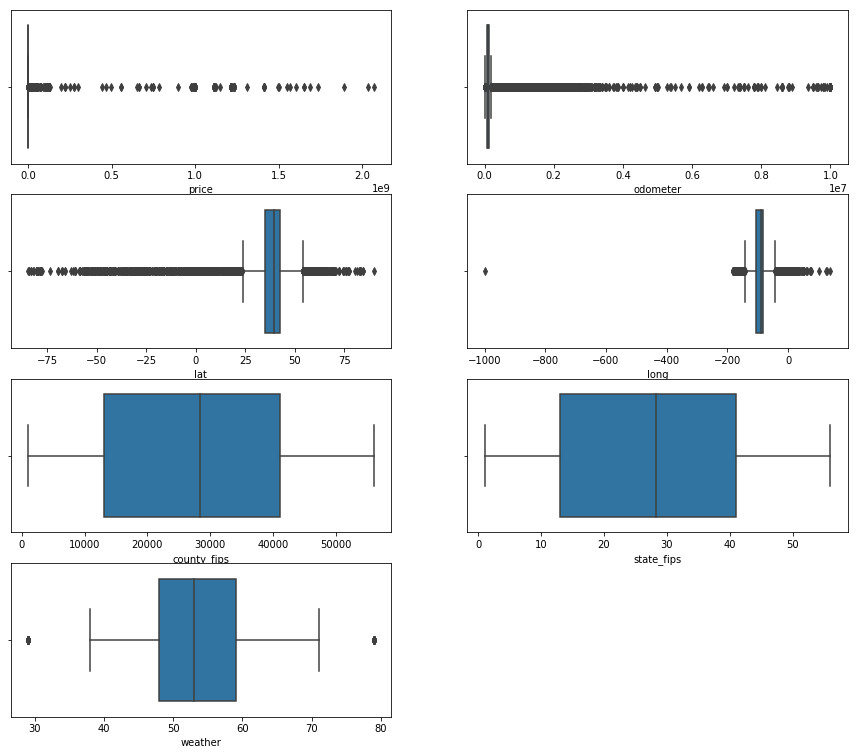

In [16]:
f = plt.figure(figsize=(15,13))

f.add_subplot(4,2,1)
sns.boxplot(numerical['price'])

f.add_subplot(4,2,2)
sns.boxplot(numerical['odometer'])

f.add_subplot(4,2,3)
sns.boxplot(numerical['lat'])

f.add_subplot(4,2,4)
sns.boxplot(numerical['long'])

f.add_subplot(4,2,5)
sns.boxplot(numerical['county_fips'])

f.add_subplot(4,2,6)
sns.boxplot(numerical['state_fips'])

f.add_subplot(4,2,7)
sns.boxplot(numerical['weather'])

# Pada visualisasi boxplot untuk variabel numerical terlihat bahwa
# pada features 'price', 'odometer', 'long', dan 'lat' terdapat banyak sekali outliers
# untuk tahapan analysis selanjutnya (modelling) perlu dilakukan normalisasi agar hasil yang didapat
# bisa merepresentasikan data
# Namun pada excercise ini hanya dilakukan EDA, sehingga tidak dilakukan normalisasi
# kami hanya melihat perilaku/karakteristik/insight dari data

### Univariate Analysis

In [16]:
# Code di bawah digunakan untuk running subplot dengan looping
# Namun dikarenakan data yang sangat banyak lopping ini lama sekali runningnya di jupyter
# Maka untuk excercise ini digunakan cara biasa dengan 2 kali running supaya lebih cepat

#fig = plt.figure(figsize = (15, 13))
#axes = 530
#for cat in categorical:
#    axes += 1
#    fig.add_subplot(axes)
#   sns.countplot(data = categorical, x = cat, order = categorical[cat].value_counts().index)
#plt.show()

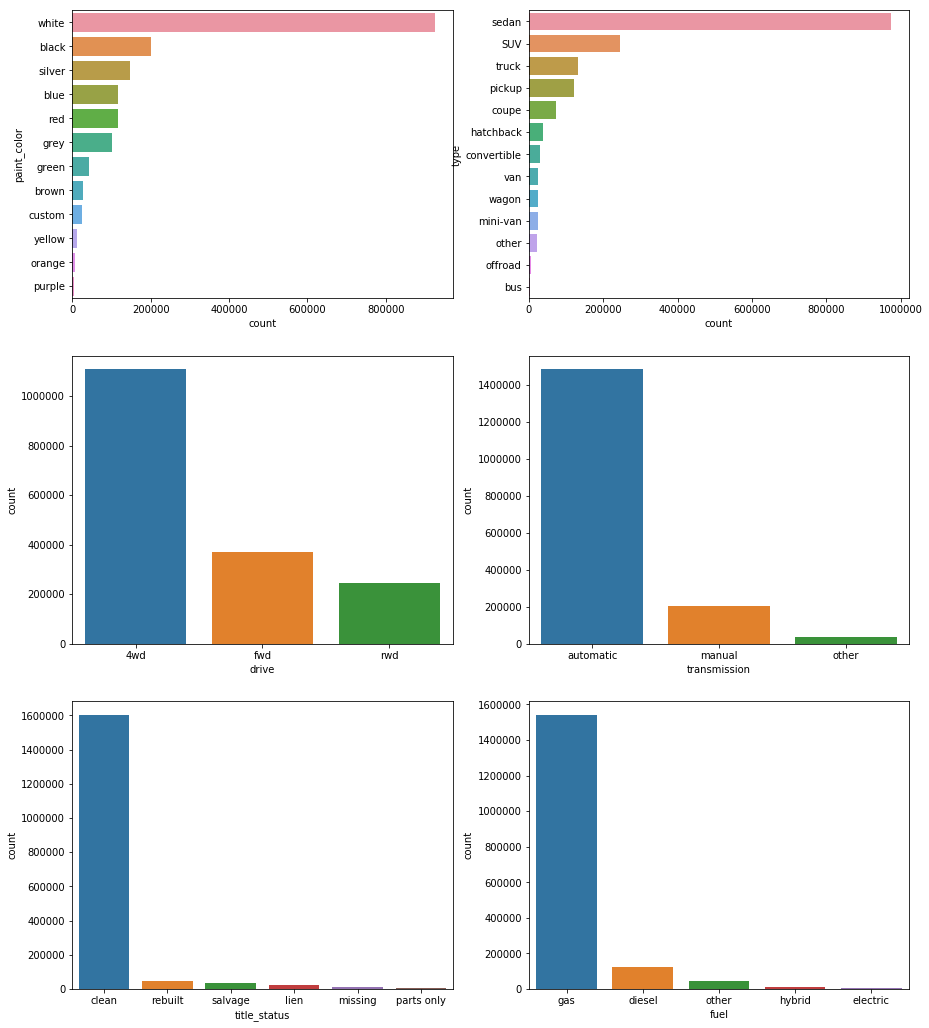

In [23]:
f = plt.figure(figsize=(15,18))

f.add_subplot(3,2,1)
sns.countplot(y=categorical['paint_color'], order=categorical['paint_color'].value_counts().index)

f.add_subplot(3,2,2)
sns.countplot(y=categorical['type'], order=categorical['type'].value_counts().index)

f.add_subplot(3,2,3)
sns.countplot(categorical['drive'], order=categorical['drive'].value_counts().index)

f.add_subplot(3,2,4)
sns.countplot(categorical['transmission'], order=categorical['transmission'].value_counts().index)

f.add_subplot(3,2,5)
sns.countplot(categorical['title_status'], order=categorical['title_status'].value_counts().index)

f.add_subplot(3,2,6)
sns.countplot(categorical['fuel'], order=categorical['fuel'].value_counts().index)

In [ ]:
# Tidak dapat dirunning
# Kemungkinan besar karena kapasitas besar dan laptop yang digunakan tidak sanggup

f = plt.figure(figsize=(15,18))

f.add_subplot(3,2,1)
sns.countplot(y = categorical['cylinders'], order=categorical['cylinders'].value_counts().index)

f.add_subplot(3,2,2)
sns.countplot(categorical['condition'], order=categorical['condition'].value_counts().index)

f.add_subplot(3,2,3)
sns.countplot(categorical['make'], order=categorical['make'].value_counts().index)

f.add_subplot(3,2,4)
sns.countplot(categorical['manufacturer'], order=categorical['manufacturer'].value_counts().index)

f.add_subplot(3,2,5)
sns.countplot(categorical['city'], order=categorical['city'].value_counts().index)

f.add_subplot(3,2,6)
sns.countplot(categorical['year'], order=categorical['year'].value_counts().index)